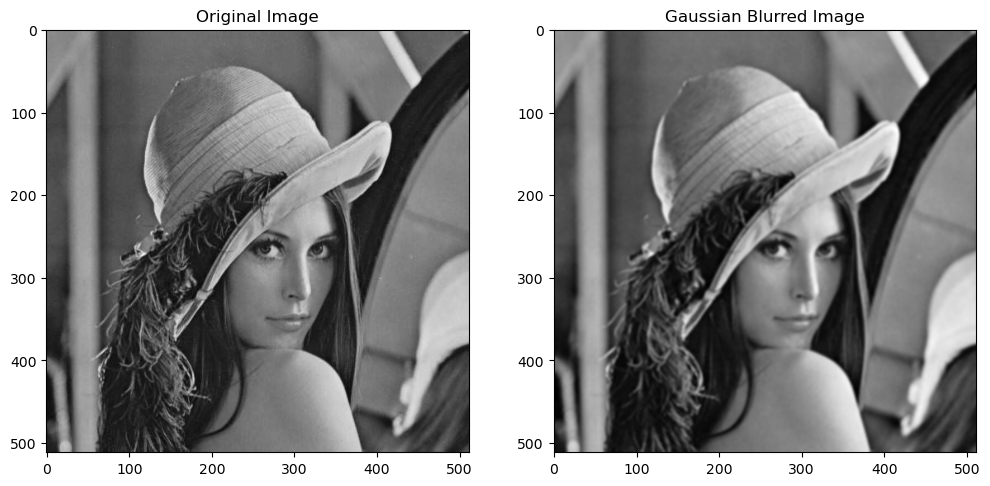

In [2]:
# 高斯卷积核操作
import cv2
import matplotlib.pyplot as plt

# 加载图像（替换为您的图像路径）
image = cv2.imread('../images/lena2.jpg', cv2.IMREAD_GRAYSCALE)

# 定义高斯核的大小和标准差
kernel_size = (5, 5)  # 可以根据需要调整
sigma = 1.5          # 可以根据需要调整

# 应用高斯卷积
gaussian_blur = cv2.GaussianBlur(image, kernel_size, sigma)

# 显示原始图像和处理后的图像
plt.figure(figsize=(12, 6))
plt.subplot(121), plt.imshow(image, cmap='gray'), plt.title('Original Image')
plt.subplot(122), plt.imshow(gaussian_blur, cmap='gray'), plt.title('Gaussian Blurred Image')
plt.show()


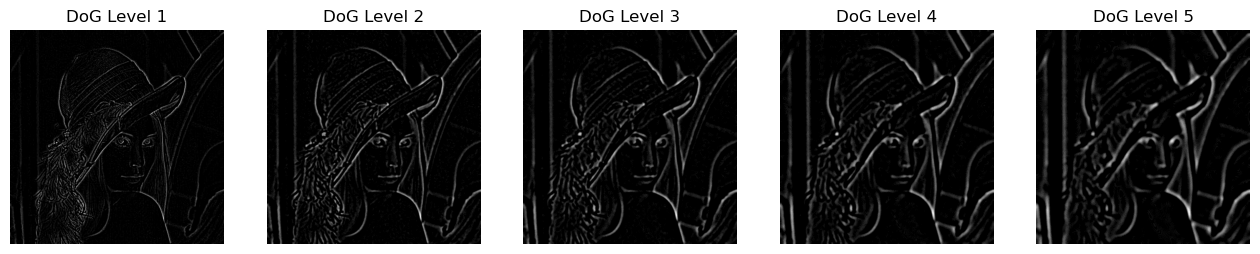

In [22]:
# Gaussain Pyrmaid
import cv2
import numpy as np
import matplotlib.pyplot as plt

def generate_gaussian_pyramid(img, num_octaves, num_scales, initial_sigma, sigma):
    """ 生成高斯金字塔 """
    pyramid = []
    k = 2 ** (1 / num_scales)

    for _ in range(num_octaves):
        octave = [img]
        for _ in range(1, num_scales + 3):
            sigma = initial_sigma * (k ** len(octave))
            img_blurred = cv2.GaussianBlur(img, (0, 0), sigma)
            octave.append(img_blurred)
        pyramid.append(octave)
        img = cv2.resize(img, (img.shape[1] // 2, img.shape[0] // 2))
    return pyramid

def generate_DoG_pyramid(gaussian_pyramid):
    """ 生成高斯差分金字塔 """
    dog_pyramid = []
    for octave in gaussian_pyramid:
        dog_octave = []
        for i in range(1, len(octave)):
            dog = cv2.subtract(octave[i], octave[i - 1])
            dog_octave.append(dog)
        dog_pyramid.append(dog_octave)
    return dog_pyramid

# 加载图像（替换为您的图像路径）
image = cv2.imread('lena.jpg', cv2.IMREAD_GRAYSCALE)

# 生成高斯金字塔
num_octaves = 4
num_scales = 3
initial_sigma = 1.6
sigma = 1.6
gaussian_pyramid = generate_gaussian_pyramid(image, num_octaves, num_scales, initial_sigma, sigma)

# 生成高斯差分金字塔
dog_pyramid = generate_DoG_pyramid(gaussian_pyramid)

# 可视化高斯差分金字塔中的一个八度
plt.figure(figsize=(16, 8))
for i, img in enumerate(dog_pyramid[0], 1):
    plt.subplot(1, len(dog_pyramid[0]), i), plt.imshow(img, cmap='gray')
    plt.title('DoG Level {}'.format(i))
    plt.axis('off')
plt.show()


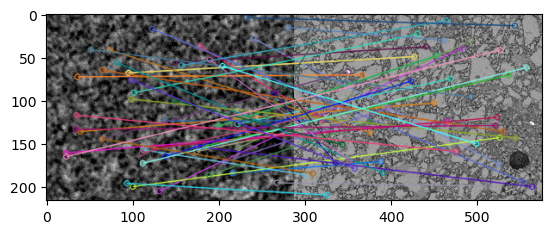

In [28]:
# SIFT算法
import cv2
import matplotlib.pyplot as plt

# 加载图像（替换为您的图像路径）
image1 = cv2.imread('ct.bmp', cv2.IMREAD_GRAYSCALE)
image2 = cv2.imread('bse.bmp', cv2.IMREAD_GRAYSCALE)

# 创建SIFT检测器
sift = cv2.SIFT_create()

# 在两幅图像上检测关键点和描述符
keypoints_1, descriptors_1 = sift.detectAndCompute(image1, None)
keypoints_2, descriptors_2 = sift.detectAndCompute(image2, None)

# 创建BFMatcher对象进行描述符匹配
bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)

# 使用BFMatcher进行匹配
matches = bf.match(descriptors_1, descriptors_2)

# 根据距离排序匹配
matches = sorted(matches, key=lambda x: x.distance)

# 绘制前N个匹配
img_matches = cv2.drawMatches(image1, keypoints_1, image2, keypoints_2, matches[:50], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

# 显示匹配结果
plt.imshow(img_matches)
plt.show()


In [7]:
# 显示SIFT特征点
import numpy as np
import cv2 as cv

def save_sift_features(read_img_name, suffix):
    img = cv.imread( f"{read_img_name}.{suffix}")
    gray= cv.cvtColor(img,cv.COLOR_BGR2GRAY)
    sift = cv.SIFT_create()
    kp = sift.detect(gray,None)
    img=cv.drawKeypoints(gray,kp,img)
    cv.imwrite(f'{read_img_name}_sift_keypoints.{suffix}', img)

save_sift_features("ct_new", "bmp")
save_sift_features("bse_new", "bmp")
save_sift_features("bse_new_high_contrast", "bmp")

In [4]:
# 皮尔森相关系数
import cv2
import numpy as np

# 加载图像（替换为您的图像路径）
image1 = cv2.imread('bse.bmp', cv2.IMREAD_GRAYSCALE)
image2 = cv2.imread('ct.bmp', cv2.IMREAD_GRAYSCALE)

# 确保图像尺寸相同
if image1.shape != image2.shape:
    raise ValueError("两幅图像的尺寸必须相同")

# 计算皮尔逊相关系数
pearson_corr = np.corrcoef(image1.ravel(), image2.ravel())[0, 1]

print("ct和bse图像之间的皮尔逊相关系数为:", pearson_corr)

# 加载图像（替换为您的图像路径）
image1_1 = cv2.imread('lena.jpg', cv2.IMREAD_GRAYSCALE)
image2_1 = cv2.imread('lena_bright.jpg', cv2.IMREAD_GRAYSCALE)
# 计算皮尔逊相关系数
pearson_corr = np.corrcoef(image1_1.ravel(), image2_1.ravel())[0, 1]

print("图像和较亮的皮尔逊相关系数为:", pearson_corr)


ct和bse图像之间的皮尔逊相关系数为: 0.049493081784954804
图像本身的皮尔逊相关系数为: 0.9705073638318952


In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def visualize_hog(img, cell_size=(8, 8), block_size=(2, 2), nbins=9):
    """ 可视化HOG特征向量 """
    hog = cv2.HOGDescriptor(_winSize=(img.shape[1] // cell_size[1] * cell_size[1],
                                      img.shape[0] // cell_size[0] * cell_size[0]),
                            _blockSize=(block_size[1] * cell_size[1],
                                        block_size[0] * cell_size[0]),
                            _blockStride=(cell_size[1], cell_size[0]),
                            _cellSize=(cell_size[1], cell_size[0]),
                            _nbins=nbins)
    
    n_cells = (img.shape[0] // cell_size[0], img.shape[1] // cell_size[1])
    hog_feats = hog.compute(img).reshape(n_cells[1] - block_size[1] + 1,
                                         n_cells[0] - block_size[0] + 1,
                                         block_size[0], block_size[1], nbins).transpose((1, 0, 2, 3, 4))

    gradients = np.zeros((n_cells[0], n_cells[1], nbins))

    # Count occurrences of gradient orientation in each cell
    for i in range(gradients.shape[0]):
        for j in range(gradients.shape[1]):
            gradients[i, j, :] = hog_feats[i, j, :, :, :].sum(axis=(0, 1))
    
    # Create an RGB image to visualize the gradients
    plt.figure(figsize=(10, 6))
    for i in range(gradients.shape[0]):
        for j in range(gradients.shape[1]):
            bin = 0
            while bin < gradients.shape[2]:
                angle = bin * (180 / nbins)
                magnitude = gradients[i, j, bin]
                end_x = int(j * cell_size[1] + magnitude * np.cos(np.deg2rad(angle)))
                end_y = int(i * cell_size[0] + magnitude * np.sin(np.deg2rad(angle)))
                # 确保线条终点不超出图像边界
                end_x = min(max(end_x, 0), img.shape[1] - 1)
                end_y = min(max(end_y, 0), img.shape[0] - 1)
                cv2.line(img, (j * cell_size[1], i * cell_size[0]), (end_x, end_y), (255, 0, 0), 1)
                bin += 1

    plt.imshow(img, cmap='gray')
    plt.title("HOG Descriptor Visualization")
    plt.show()

# 加载图像（替换为您的图像路径）
image = cv2.imread('../images/ct-bse/ct_new.bmp', cv2.IMREAD_GRAYSCALE)

# 可视化HOG特征
visualize_hog(image)


IndexError: index 80 is out of bounds for axis 1 with size 80

In [25]:
from skimage import feature, exposure
import cv2

img_name = 'ct'
suffix = 'bmp'

# 确保路径正确
image = cv2.imread(f"{img_name}.{suffix}", cv2.IMREAD_GRAYSCALE)

# 检查图像是否加载成功
if image is None:
    raise FileNotFoundError(f"无法加载图像：{img_name}.{suffix}")

# 计算HOG特征
fd, hog_image = feature.hog(image, orientations=9, pixels_per_cell=(16, 16),
                            cells_per_block=(2, 2), visualize=True)

# 重新调整HOG图像的亮度以获得更好的显示效果(针对于归一化的图像之后再给它映射到0~255，最大值会映射到255，这样更利于显示)
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, hog_image.max()), out_range=(0, 255))

# 保存HOG图像
cv2.imwrite(f'{img_name}_hog.{suffix}', hog_image_rescaled)


True

傅里叶变换结果（复数形式）:
[[10.+0.j -2.+0.j]
 [-4.+0.j  0.+0.j]]


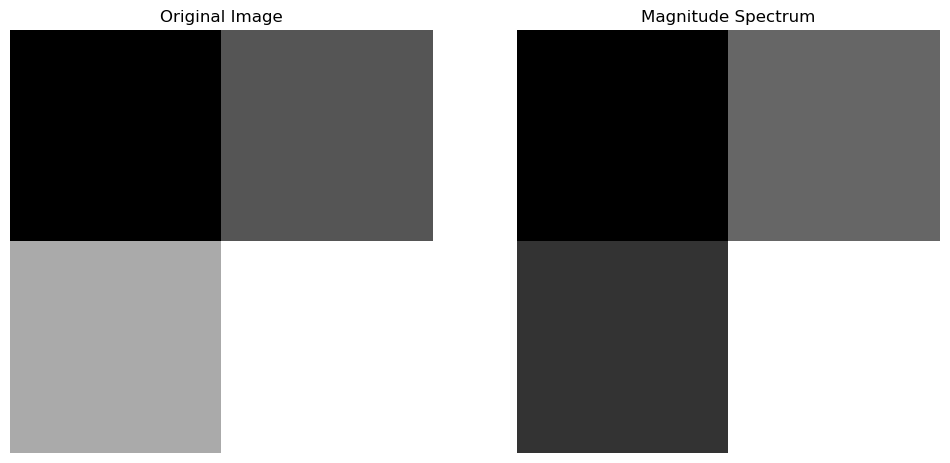

In [3]:
# Phase Congruency

import numpy as np
import matplotlib.pyplot as plt
import cv2


path = "../images/lena"

# 定义一个简单的2x2图像
image_river =  cv2.imread(f"{path}/river.bmp", cv2.IMREAD_GRAYSCALE)
image_lena =  cv2.imread(f"{path}/lena.bmp", cv2.IMREAD_GRAYSCALE)


# 执行傅里叶变换
f_transform_river = np.fft.fft2(image_river)
f_transform_lena = np.fft.fft2(image_lena)

# 将频域中心移动到图像中心
f_shifted = np.fft.fftshift(f_transform)

# 计算幅度谱
magnitude_spectrum = np.abs(f_shifted)

# 打印傅里叶变换的结果
print("傅里叶变换结果（复数形式）:")
print(f_transform)

# 可视化
plt.figure(figsize=(12, 6))

plt.subplot(121)
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.axis('off')

plt.subplot(122)
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title("Magnitude Spectrum")
plt.axis('off')

plt.show()



In [12]:
import numpy as np
from skimage.feature import graycomatrix, graycoprops
import cv2

def compute_glcm_and_properties(image, distances, angles, levels=256):
    """
    使用 skimage 库计算灰度共生矩阵及其属性。

    参数:
    - image: 2D numpy数组，灰度图像。
    - distances: 像素对之间的距离列表。
    - angles: 像素对之间的角度列表，以弧度为单位。
    - levels: 图像中的灰度级别数。
    
    返回:
    - GLCM矩阵及其统计属性。
    """
    # 计算GLCM
    glcm = graycomatrix(image, distances, angles, levels=levels, symmetric=True, normed=True)

    # 计算GLCM的一些统计属性
    contrast = graycoprops(glcm, 'contrast')[0, 0]
    dissimilarity = graycoprops(glcm, 'dissimilarity')[0, 0]
    homogeneity = graycoprops(glcm, 'homogeneity')[0, 0]
    energy = graycoprops(glcm, 'energy')[0, 0]
    correlation = graycoprops(glcm, 'correlation')[0, 0]

    return glcm, contrast, dissimilarity, homogeneity, energy, correlation

# 示例图像
path = "../images/ct-bse"
ct_image = cv2.imread(f"{path}/ct_new.bmp", cv2.IMREAD_GRAYSCALE)
bse_image = cv2.imread(f"{path}/bse_new.bmp", cv2.IMREAD_GRAYSCALE)
lena_image = cv2.imread(f"../images/lena/lena.jpg", cv2.IMREAD_GRAYSCALE)
# np.array([
#     [0, 0, 1, 1],
#     [0, 0, 1, 1],
#     [0, 2, 2, 2],
#     [2, 2, 3, 3]
#], dtype=np.uint8)

img_name = ["ct", "bse", "lena"]
imgs = [ct_image, bse_image, lena_image]
for i in range(len(img_name)):
    print(img_name[i])
    for j in range(1):
        # 计算GLCM及其属性
        print("j: ",j)
        glcm, contrast, dissimilarity, homogeneity, energy, correlation = compute_glcm_and_properties(imgs[i], [j+1], [j*15])
        # 输出结果
        # print("GLCM:\n", glcm)
        print("Contrast:", contrast)
        print("Dissimilarity:", dissimilarity)
        print("Homogeneity:", homogeneity)
        print("Energy:", energy)
        print("Correlation:", correlation)

ct
j:  0
Contrast: 38.80330788804072
Dissimilarity: 4.874307257744473
Homogeneity: 0.1870663401903652
Energy: 0.021890892419467407
Correlation: 0.9772132041977856
bse
j:  0
Contrast: 31.002086992155487
Dissimilarity: 4.150067322327597
Homogeneity: 0.22569459162837574
Energy: 0.05549288811525131
Correlation: 0.7571848370295087
lena
j:  0
Contrast: 102.42485628669276
Dissimilarity: 5.167899951076322
Homogeneity: 0.33294091598574477
Energy: 0.024479646714653792
Correlation: 0.9766801370870815
